In [1]:
import pandas as pd
import numpy as np
from agent import Agent
from trading_env import TradingEnv
from trading_env_plotter import TradingEnvPlotter

Episode 1/2 - Total Reward: 38057.94
Episode 2/2 - Total Reward: 26995.00


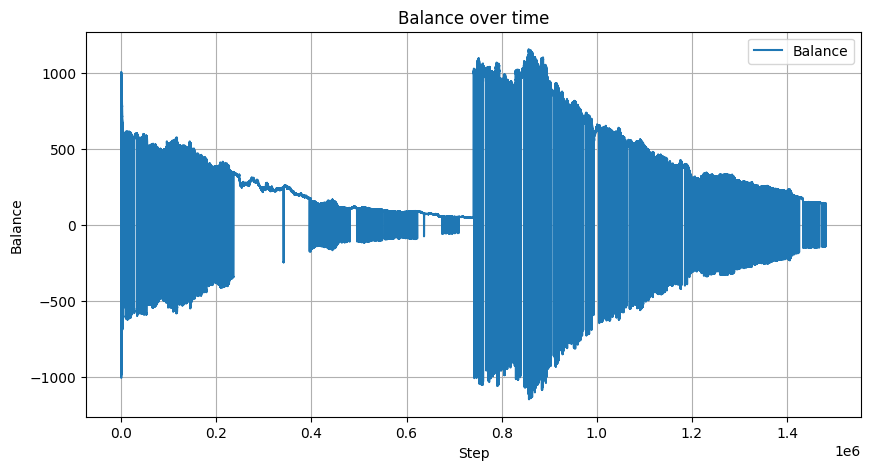

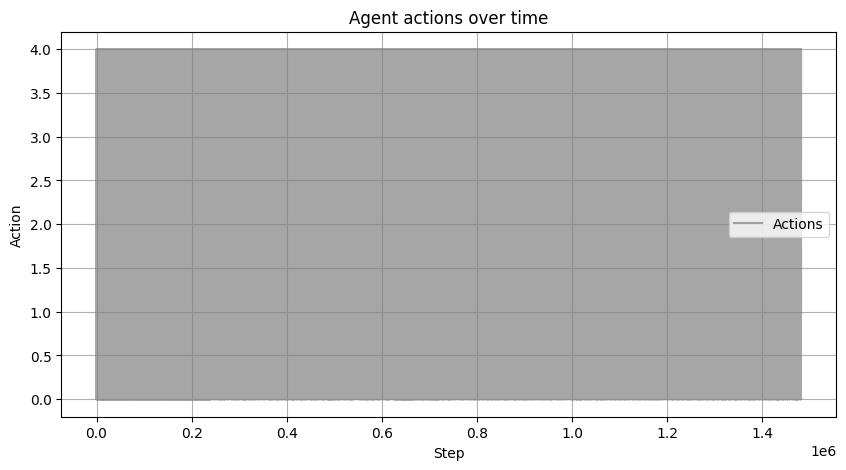

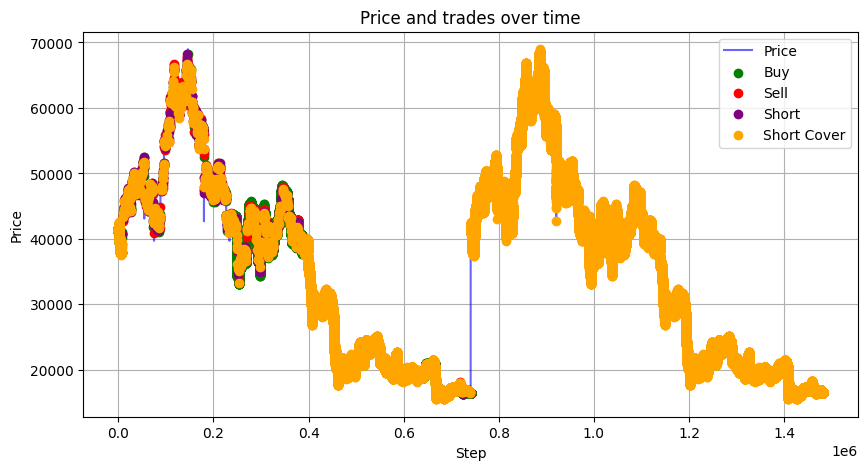

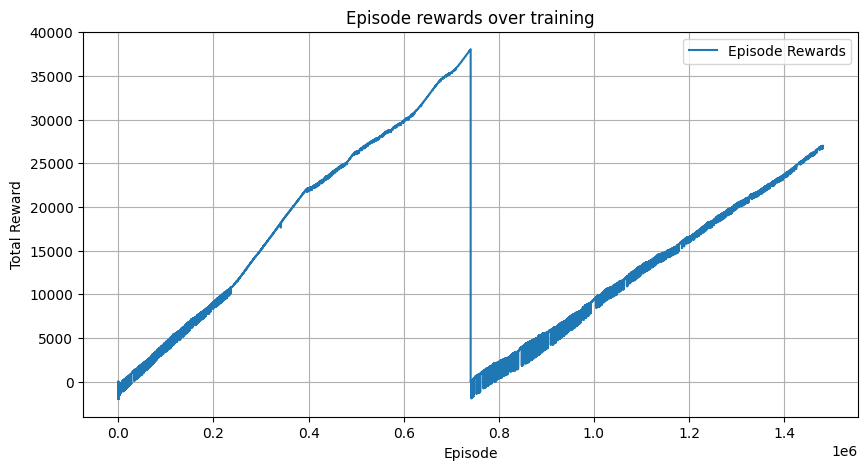

In [2]:
# Hyperparameters
EPISODES = 2  # 300
LEARNING_RATE = 0.001
GAMMA = 0.99
INPUT_DIM = 1

def main():
    df = pd.read_csv('../csv/BTCUSDT_1m_20210801_20221231.csv')
    prices = df['close'].values

    env = TradingEnv(prices)
    agent = Agent(INPUT_DIM, action_dim=5, learning_rate=LEARNING_RATE, gamma=GAMMA)
    plotter = TradingEnvPlotter(env)

    for episode in range(1, EPISODES + 1):
        state = env.reset()
        total_reward = 0

        while True:
            action = agent.select_action(state)
            next_state, reward, done = env.step(action)

            # For visualization later
            plotter.record_step(action)
            plotter.record_episode_reward(total_reward)

            agent.train(state, action, reward, next_state, done)

            state = next_state
            total_reward += reward
            # print(reward

            if done:
                break

        print(f"Episode {episode}/{EPISODES} - Total Reward: {total_reward:.2f}")

    # Visualization after training
    plotter.plot_balance()
    plotter.plot_actions()
    plotter.plot_prices_and_trades()
    plotter.plot_episode_rewards()

if __name__ == "__main__":
    main()
